In [1]:
import cogent3
from cogent3 import get_app
import matplotlib.pyplot as plt
import paths
import libs
import plotly

# CDS

I sampled chromosome 22 cds using 
```
eti homologs -i install/ --outdir cds --ref human --coord_names 22 
```
Then I trim stop codons and use a codon alignment model for all the sequences using
```
trim_stops = get_app("trim_stop_codons")
codon_align = get_app("progressive_align", "codon", guide_tree="(Human:0.06,Chimpanzee:0.06,Gorilla:0.1)")
```
I store the aligned sequences in the folder cds/codon_aligned/

In [2]:
folder_in = paths.DATA_APES114 + 'cds/codon_aligned/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           345
not_completed        51
logs                  1
-----------------------


In [3]:
loader = get_app("load_aligned", moltype="dna")   
omit_degs = get_app("omit_degenerates", moltype="dna", motif_length=3)
ffold = get_app("take_codon_positions", fourfold_degenerate=True)
concat = get_app("concat", moltype="dna")

#create a concatenated alignment with all coding positions
ffoldprocess = loader+omit_degs+ffold
# result below is only valid alignments (no NotCompleted).
results_ffold = [r for r in ffoldprocess.as_completed(in_dstore[:], parallel=True) if r]
ffold_alns = concat(results_ffold)
ffold_alns.source = "cds_alignments"

ffold_alns

   0%|          |00:00<?

,0
Chimpanzee,GAGGGGGCCTCTCCCGCGCGCCCGGGCTGTGCGCATGATCAGGGGGTTGAGTTGCCCTGC
Human,............................................................
Gorilla,......................................G.....................


In [4]:
#Do a Kimura 1980 substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_ffold = sm(ffold_alns)
print("Model results : \n" + str(result_ffold.lf) + "\n")

print("Distances: ")
lengthstree_ffold = result_ffold.lf.get_lengths_as_ens()
humanENS_ffold = lengthstree_ffold["Human"]
print(lengthstree_ffold)

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -131955.0316
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Human         root        0.01    1.06    4.01    0.39    0.78    0.97
Gorilla       root        0.01    0.79    4.67    0.51    0.74    1.09
Chimpanzee    root        0.01    1.54    5.64    1.03    1.09    1.90
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
5.22    6.17    1.18    0.84    0.31    2.71
4.15    5.22    1.43    0.90    0.39    4.05
8.29    9.78    1.50    1.71    1.00    6.22
--------------------------------------------

   A       C       G       T
----------------------------
0.15    0.38    0.31    0.16
----------------------------

Distances: 
{'Human': np.float64(0.007866037296868678), 'Gorilla': np.float64(0.014230379739

In [5]:
totalENS_ffold = result_ffold.total_length(length_as="ENS")
totalENS_ffold

np.float64(0.03024223579060392)

In [6]:
tree = result_ffold.tree
fig = tree.get_figure()
fig.scale_bar = "top right"
fig.show(width=500, height=500)

# Intron sample alignment

I sampled chromosome 22 introns masking ancestral repeats and cds using 
```
eti alignments -i install -od introns --align_name 10_primates* --ref human --mask cds_allAR_1column.txt --coord_names 22 
```
where cds_allAR_1column.txt is a list containing all the biotypes for ancestral repeats and cds

For this and all sequence below I use a nucleotide alignment model

```
nt_align = get_app("progressive_align", "nucleotide", guide_tree="(Human:0.06,Chimpanzee:0.06,Gorilla:0.1)")
```

I store the aligned sequences in the folder introns/codon_aligned/

In [7]:
folder_in = paths.DATA_APES114 + 'introns/nt_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           410
not_completed       133
logs                  1
-----------------------


In [ ]:
#perform a codon alignment and remove stop codons
loader = get_app("load_aligned", moltype="dna")
omit_degs = get_app("omit_degenerates", moltype="dna")
concat = get_app("concat", moltype="dna")

app = loader + omit_degs
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in app.as_completed(in_dstore[:], parallel=True) if r]
alns_introns = concat(results_allpos)
alns_introns.source = "introns_alignments"
alns_introns

   0%|          |00:00<?

,0
Chimpanzee,AGCCACCCCCATCCCCTTCCCTCTTCCTGAGCACAGACATGGCTCCCCCACCTCCTCACA
Human,............................................................
Gorilla,................................................T...........


In [9]:
#Do a Kimura 1980 substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_introns = sm(alns_introns)
print("Model results : \n" + str(result_introns.lf) + "\n")

print("Distances: ")
lengthstree_introns = result_introns.lf.get_lengths_as_ens()
humanENS_intron = lengthstree_introns["Human"]
print(lengthstree_introns)

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -9250412.3019
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Human         root        0.01    0.99    2.39    0.93    0.96    1.13
Gorilla       root        0.02    0.93    2.15    0.92    0.93    1.06
Chimpanzee    root        0.01    1.00    2.12    1.05    1.09    1.17
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
3.52    3.52    1.15    0.99    0.90    2.43
2.59    2.66    1.09    0.99    1.00    2.15
3.11    3.17    1.17    1.17    0.99    2.01
--------------------------------------------

   A       C       G       T
----------------------------
0.24    0.26    0.26    0.24
----------------------------

Distances: 
{'Human': np.float64(0.009092617525106145), 'Gorilla': np.float64(0.01988229471

In [10]:
totalENS_introns = result_introns.total_length(length_as="ENS")
totalENS_introns

np.float64(0.041135364909087785)

In [11]:
tree = result_introns.tree
fig = tree.get_figure()
fig.scale_bar = "top right"
fig.show(width=500, height=500)

# Intron AR sample alignment

I sampled chromosome 22 introns masking everythin but ancestral repeats using 
```
eti alignments -i install -od intronsAR --align_name 10_primates* --ref human --mask_shadow ancestralrepeats_1column.txt --coord_names 22 
```
where ancestralrepeats_1column.txt is a list containing the ancestral repeats biotypes: 
Type I Transposons/LINE,
Type I Transposons/SINE,
Type II Transposons,
LTRs

In [12]:
folder_in = paths.DATA_APES114 + 'intronsAR/nt_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           422
not_completed       131
logs                  1
-----------------------


In [ ]:
#perform a codon alignment and remove stop codons
loader = get_app("load_aligned", moltype="dna")
omit_degs = get_app("omit_degenerates", moltype="dna")
concat = get_app("concat", moltype="dna")

app = loader + omit_degs
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in app.as_completed(in_dstore[:], parallel=True) if r]
alns_intronsAR = concat(results_allpos)
alns_intronsAR.source = "intronsAR_alignments"
alns_intronsAR

   0%|          |00:00<?

,0
Chimpanzee,CAAAACCTCTTTCCACTCTCCAGCCCTGTGGCCTCGGAAGGGCTACTCCATCTCTCTGAA
Human,...........................................C................
Gorilla,............................................................


In [14]:
#Do a Kimura 1980 substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intronsAR = sm(alns_intronsAR)
print("Model results : \n" + str(result_intronsAR.lf) + "\n")

print("Distances: ")
lengthstree_intronsAR = result_intronsAR.lf.get_lengths_as_ens()
humanENS_intronAR = lengthstree_intronsAR["Human"]
print(lengthstree_intronsAR)

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -8240427.7037
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Human         root        0.01    1.01    2.61    1.09    1.08    1.11
Gorilla       root        0.03    1.00    2.20    1.16    1.17    1.05
Chimpanzee    root        0.02    1.13    2.13    1.17    1.14    1.13
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
4.37    4.44    1.08    1.16    0.99    2.54
2.97    3.02    1.03    1.11    1.17    2.14
3.34    3.28    1.19    1.19    1.04    2.03
--------------------------------------------

   A       C       G       T
----------------------------
0.26    0.24    0.24    0.26
----------------------------

Distances: 
{'Human': np.float64(0.009898557798858527), 'Gorilla': np.float64(0.02662930055

In [15]:
totalENS_intronsAR = result_intronsAR.total_length(length_as="ENS")
totalENS_intronsAR

np.float64(0.051893001668544936)

In [16]:
tree = result_intronsAR.tree
fig = tree.get_figure()
fig.scale_bar = "top right"
fig.show(width=500, height=500)

# Intergenic sample alignment

I sampled chromosome 22 intergenic masking ancestral repeats and cds using 
```
eti alignments -i install -od intergenic --align_name 10_primates* --ref human --mask allAR_1column.txt --ref_coords chrom22-intergenic.tsv
```

where cds_allAR_1column.txt is the same as discussed in the intron section.

chrom22-intragenic.tsv is a table with intergenic regions coordinates. The instructions to make this table are discussed in "location_inter_intragenic.ipynb"

In [19]:
folder_in = paths.DATA_APES114 + 'intergenic/nt_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           503
not_completed       203
logs                  1
-----------------------


In [20]:
#perform a codon alignment and remove stop codons
loader = get_app("load_aligned", moltype="dna")
omit_degs = get_app("omit_degenerates", moltype="dna")
concat = get_app("concat", moltype="dna")

app = loader + omit_degs
results_allpos = [r for r in app.as_completed(in_dstore[:], parallel=True) if r]
alpos_alns = concat(results_allpos)
alpos_alns.source = "intergenic_alignments"
alpos_alns

   0%|          |00:00<?

Exception ignored in: <function tqdm.__del__ at 0x7f5735f6b380>
Traceback (most recent call last):
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/std.py", line 1148, in __del__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 282, in close
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 171, in display
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 716, in __set__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 706, in set
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 1513, in _notify_trait
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/ipywidgets/widgets/widget.py", line 700, in notify_change
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/si

,0
Chimpanzee,AGCCCCTGCCCCACCCAGAATCACGGGGGGCCTGGGGACAAGTTTTCACCTCCTGAGATC
Human,...T........................................................
Gorilla,............................................................


In [21]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intergenic = sm(alpos_alns)

print("Distances: ")
lengthstree_intergenic = result_intergenic.lf.get_lengths_as_ens()
humanENS_intergenic = lengthstree_intergenic["Human"]
print(lengthstree_intergenic)

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Human': np.float64(0.01191492717352187), 'Gorilla': np.float64(0.021300930563851742), 'Chimpanzee': np.float64(0.018706361774143632)}


In [22]:
totalENS_intergenic = result_intergenic.total_length(length_as="ENS")
totalENS_intergenic

np.float64(0.05192221951151724)

# Intergenic AR sample alignment

I sampled chromosome 22 intergenic regions masking everything but ancestral repeats using 
```
eti alignments -i install -od intergenicAR --align_name 10_primates* --ref human --mask_shadow ancestralrepeats_1column.txt --ref_coords chrom22-intergenic.tsv
```

where ancestralrepeats_1column.txt is the same as discussed in the introns AR section and chrom22-intergenic.tsv is the same as discussed in the intergenic section.

In [23]:
folder_in = paths.DATA_APES114 + 'intergenicAR/nt_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           517
not_completed       184
logs                  1
-----------------------


In [24]:
#perform a codon alignment and remove stop codons
loader = get_app("load_aligned", moltype="dna")
omit_degs = get_app("omit_degenerates", moltype="dna")
concat = get_app("concat", moltype="dna")

app = loader + omit_degs
results_allpos = [r for r in app.as_completed(in_dstore[:], parallel=True) if r]
alpos_alns = concat(results_allpos)
alpos_alns.source = "intergenicAR_alignments"
alpos_alns

   0%|          |00:00<?

,0
Chimpanzee,GTCCTCAGAATCACCTTTTCTTAACTTTATTATTCTCTCAATTATAAAACATTTAAAAAC
Human,.............T..............................................
Gorilla,.............TT.............................................


In [25]:
#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intergenicAR = sm(alpos_alns)

print("Distances: ")
lengthstree_intergenicAR = result_intergenicAR.lf.get_lengths_as_ens()
humanENS_intergenicAR = lengthstree_intergenicAR["Human"]
print(lengthstree_intergenicAR)

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Human': np.float64(0.011093661648081624), 'Gorilla': np.float64(0.025980348349385812), 'Chimpanzee': np.float64(0.017492650676392482)}


In [26]:
totalENS_intergenicAR = result_intergenicAR.total_length(length_as="ENS")
totalENS_intergenicAR

np.float64(0.054566660673859915)

# Plotting divergance and constraint estimates

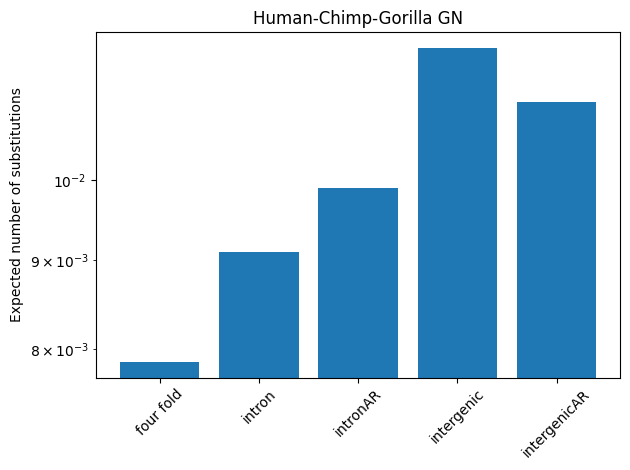

{'four fold': np.float64(0.007866037296868678), 'intron': np.float64(0.009092617525106145), 'intronAR': np.float64(0.009898557798858527), 'intergenic': np.float64(0.01191492717352187), 'intergenicAR': np.float64(0.011093661648081624)}


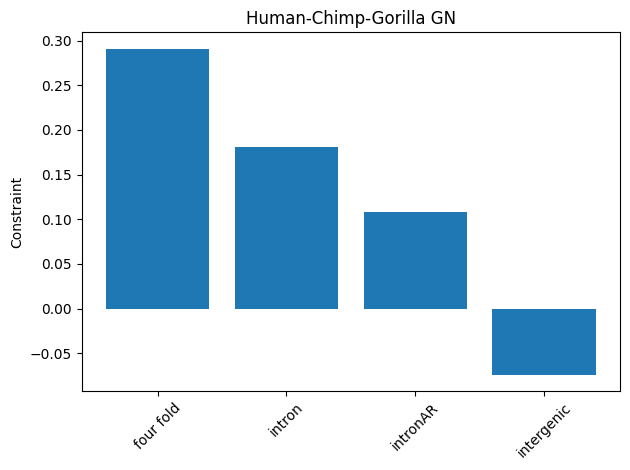

{'four fold': np.float64(0.2909431036930069),
 'intron': np.float64(0.1803772448136194),
 'intronAR': np.float64(0.10772852887844853),
 'intergenic': np.float64(-0.07403015807519808)}

In [27]:
ENS_human_GN = {
    "four fold": humanENS_ffold,
    "intron": humanENS_intron,
    "intronAR": humanENS_intronAR,
    "intergenic": humanENS_intergenic,
    "intergenicAR": humanENS_intergenicAR

}

constraint_GN = {
    "four fold": 1-humanENS_ffold/humanENS_intergenicAR,
    "intron": 1-humanENS_intron/humanENS_intergenicAR,
    "intronAR": 1-humanENS_intronAR/humanENS_intergenicAR,
    "intergenic": 1-humanENS_intergenic/humanENS_intergenicAR
}

plt.figure()
plt.bar(ENS_human_GN.keys(), ENS_human_GN.values())
plt.yscale("log")
plt.ylabel("Expected number of substitutions")
plt.title("Human-Chimp-Gorilla GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(ENS_human_GN)

plt.figure()
plt.bar(constraint_GN.keys(), constraint_GN.values())
plt.ylabel("Constraint")
plt.title("Human-Chimp-Gorilla GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

constraint_GN

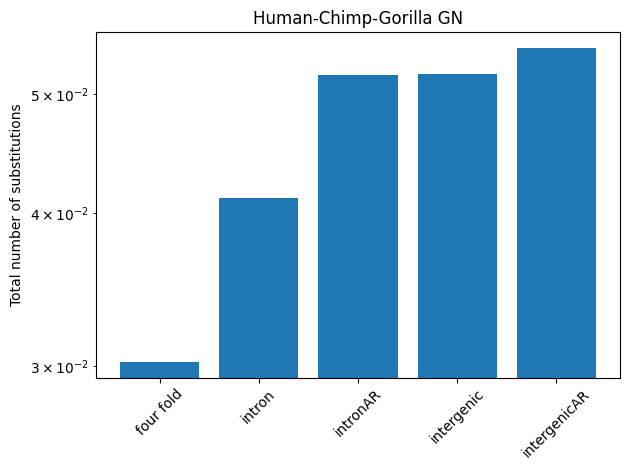

{'four fold': np.float64(0.03024223579060392), 'intron': np.float64(0.041135364909087785), 'intronAR': np.float64(0.051893001668544936), 'intergenic': np.float64(0.05192221951151724), 'intergenicAR': np.float64(0.054566660673859915)}


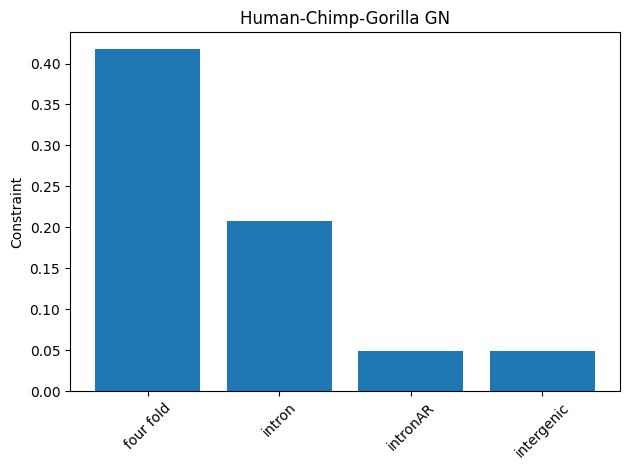

{'four fold': np.float64(0.41721937798531084),
 'intron': np.float64(0.20730419157807012),
 'intronAR': np.float64(0.04899803235706879),
 'intergenic': np.float64(0.04846258007519033)}

In [29]:
totalENS_human_GN = {
    "four fold": totalENS_ffold,
    "intron": totalENS_introns,
    "intronAR": totalENS_intronsAR,
    "intergenic": totalENS_intergenic,
    "intergenicAR": totalENS_intergenicAR
}

totalENS_constraint_GN = {
    "four fold": 1-totalENS_ffold/totalENS_intronsAR,
    "intron": 1-totalENS_introns/totalENS_intronsAR,
    "intronAR": 1-totalENS_intronsAR/totalENS_intergenicAR,
    "intergenic": 1-totalENS_intergenic/totalENS_intergenicAR
}

plt.figure()
plt.bar(totalENS_human_GN.keys(), totalENS_human_GN.values())
plt.yscale("log")
plt.ylabel("Total number of substitutions")
plt.title("Human-Chimp-Gorilla GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(totalENS_human_GN)

plt.figure()
plt.bar(totalENS_constraint_GN.keys(), totalENS_constraint_GN.values())
plt.ylabel("Constraint")
plt.title("Human-Chimp-Gorilla GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

totalENS_constraint_GN